# Comparison of the stability analysis of BOO and eCD gate

This notebook compares the results of the stability analyses conducted in the notebooks "stability_boo.ipynb" and "stability_ecd.ipynb". This notebook simply loads the .txt files produced there and puts them into one plot.

## Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from helpers import *

In [5]:
omg_err_boo   = np.loadtxt('../data/omg_err_boo_29.txt')
delta_err_boo = np.loadtxt('../data/delta_err_boo_29.txt')
omg_err_ecd   = np.loadtxt('../data/omg_err_ecd_29.txt')
delta_err_ecd = np.loadtxt('../data/delta_err_ecd_29.txt')

## Make plot

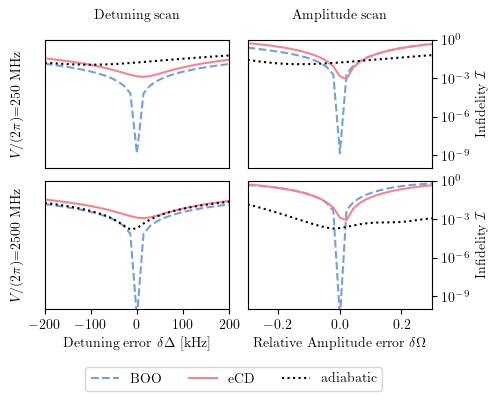

In [6]:
# Define parameters
blockades = [250, 2500]
B_indices = [0, 2]
pad = 15

# Make plot
fig, ax = plt.subplots(2, 2, figsize=(5, 3.5))
for idx, B_idx in enumerate(B_indices):
    
    # Detuning errors
    ax[idx][0].plot(
        delta_err_boo[0] / 2 / np.pi / 1e3,
        delta_err_boo[B_idx + 2],
        label="BOO",
        ls='--',
        color=col1
    )
    ax[idx][0].plot(
        delta_err_ecd[0] / 2 / np.pi * 1e3, 
        delta_err_ecd[idx + 1], 
        label="eCD", 
        color=col0
    )
    ax[idx][0].plot(
        delta_err_boo[0] / 2 / np.pi / 1e3,
        delta_err_boo[B_idx + 1],
        label="adiabatic",
        color='k', ls=':'
    )
    
    # Rabi pulse errors
    ax[idx][1].plot(
        omg_err_boo[0],
        omg_err_boo[B_idx + 2],
        label="BOO",
        ls='--',
        color=col1
    )
    ax[idx][1].plot(
        omg_err_ecd[0], 
        omg_err_ecd[idx + 1], 
        label="eCD", 
        color=col0
    )
    ax[idx][1].plot(
        omg_err_boo[0], 
        omg_err_boo[B_idx + 1], 
        label="adiabatic", 
        color='k', ls=':'
    )
    # Axes formatting
    ax[idx][0].set_yscale("log")
    ax[idx][1].set_yscale("log")

    ax[idx][1].set_yticks([1, 1e-3, 1e-6, 1e-9])
    ax[idx][1].yaxis.tick_right()
    ax[idx][1].yaxis.set_label_position("right")
    ax[idx][1].set_ylabel("Infidelity $\\mathcal{I}$")
    ax[idx][0].set_yticks([])
    ax[idx][0].set_ylabel(f"$V/(2\\pi)$={blockades[idx]} MHz", labelpad=pad)
    
    ax[0][idx].set_xticks([])
    ax[0][idx].xaxis.set_label_position("top")
    
    # Axes limits
    ax[idx][0].set_xlim(delta_err_boo[0, 0] / 2 / np.pi / 1e3, delta_err_boo[0,-1] / 2 / np.pi / 1e3)
    ax[idx][1].set_xlim(omg_err_ecd[0, 0], omg_err_ecd[0, -1])

for a in ax.ravel():
    a.set_ylim(1e-10, 1e-0)

# Axis labels
ax[0][0].set_xlabel(f"Detuning scan", labelpad=pad)
ax[0][1].set_xlabel(f"Amplitude scan", labelpad=pad)

ax[1][0].set_xlabel("Detuning error $\\delta\\Delta$ [kHz]")
ax[1][1].set_xlabel("Relative Amplitude error $\\delta\\Omega$")
ax[0][0].legend(bbox_to_anchor=(1.025, -1.5), ncol=3, loc='upper center')

# Show plot
fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig('../figures/fig2.pdf', format = 'pdf', facecolor='white', bbox_inches='tight', dpi = 300)
plt.show()